# Импорты

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Считываем данные и готовим их к дальнейшему анализу

# Чтение данных

In [45]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv')
# df.head()

/var/folders/dm/ltzh8my50bvc6cdr0_wggrjr0000gq/T/ipykernel_58289/1338807228.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accepted_2007_to_2018Q4.csv')


In [46]:
with pd.option_context('display.max_columns',None):
    display(df.head())
df.info()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


# Чистка данных

Почистим данные: столбцы со всеми уникальными значениями можем сразу выкинуть, так как всё уже отображено в sub_grade

In [47]:
# df = df.drop(['id','policy_code','out_prncp',
#               'out_prncp_inv','url','pymnt_plan',
#               'hardship_flag','grade'],
#              axis=1)

Столбцы с слишком большим количеством нулевых значений отбрасываются. Чтобы упростить задачу классификации, столбцы должны быть заполнены хотя бы на 90%.

In [48]:
# percent = df.isnull().sum() / len(df)
# nan_cols = percent.iloc[np.where(np.array(percent) > 0.1)].index
# print(len(nan_cols), "- удалено")


In [49]:
# df = df.drop(nan_cols, axis=1)

# Анализ категориальных признаков

Посмотрим на `loan_status`

<AxesSubplot:xlabel='count', ylabel='loan_status'>

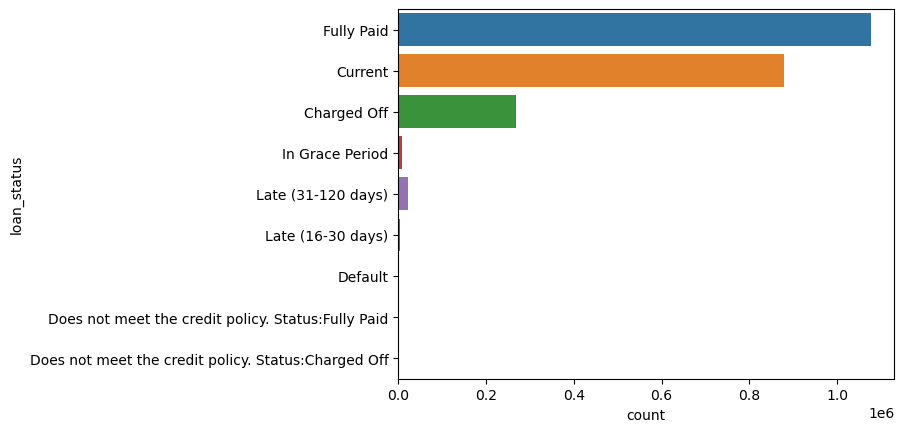

In [50]:
sns.countplot(y='loan_status', data=df)

Нас интересуют только просроченные `Charged Off` и полностью погашенные `Fully Paid` кредиты

In [51]:
df = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]
# df['label'] = df.apply(lambda r: 1 if r['loan_status'] == 'Fully Paid' else 0, axis=1)
# df = df.drop('loan_status', axis=1)

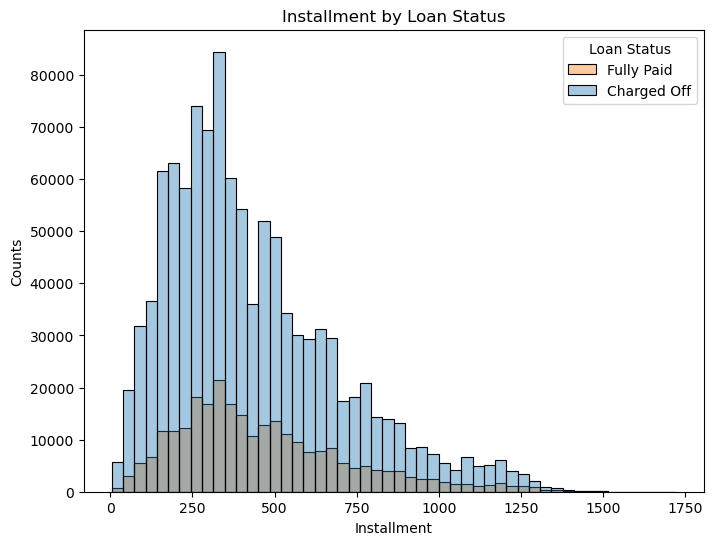

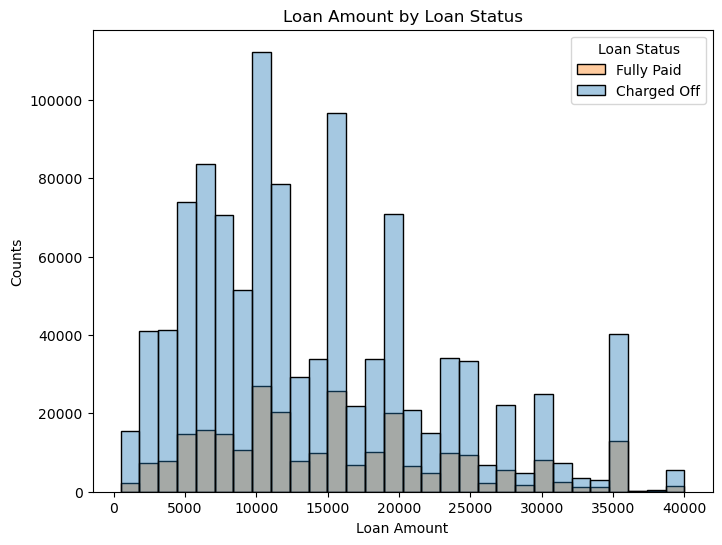

In [52]:
# Создание графика гистограммы для 'installment' по 'loan_status'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='installment', hue='loan_status', bins=50, alpha=0.4)
plt.title('Installment by Loan Status')
plt.xlabel('Installment')
plt.ylabel('Counts')
legend_labels = ['Fully Paid', 'Charged Off']
plt.legend(title='Loan Status', labels=legend_labels, loc='upper right')

# Создание графика гистограммы для 'loan_amnt' по 'loan_status'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='loan_amnt', hue='loan_status', bins=30, alpha=0.4)
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Counts')
legend_labels = ['Fully Paid', 'Charged Off']
plt.legend(title='Loan Status', labels=legend_labels, loc='upper right')

# Отображение графиков
plt.show()

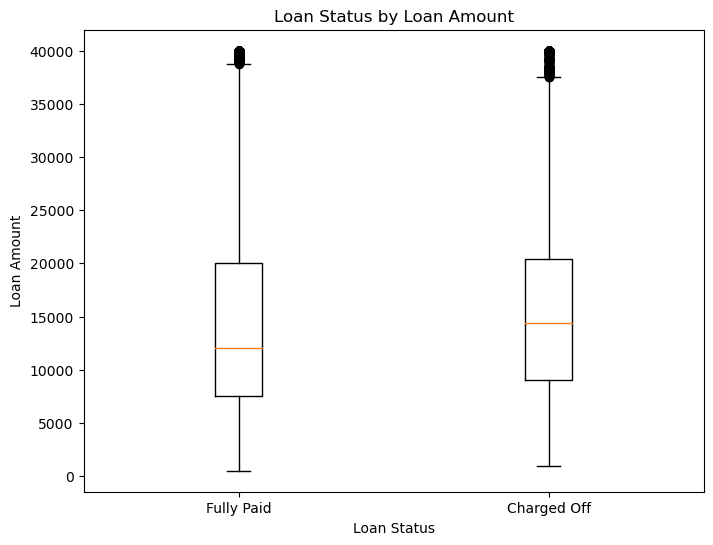

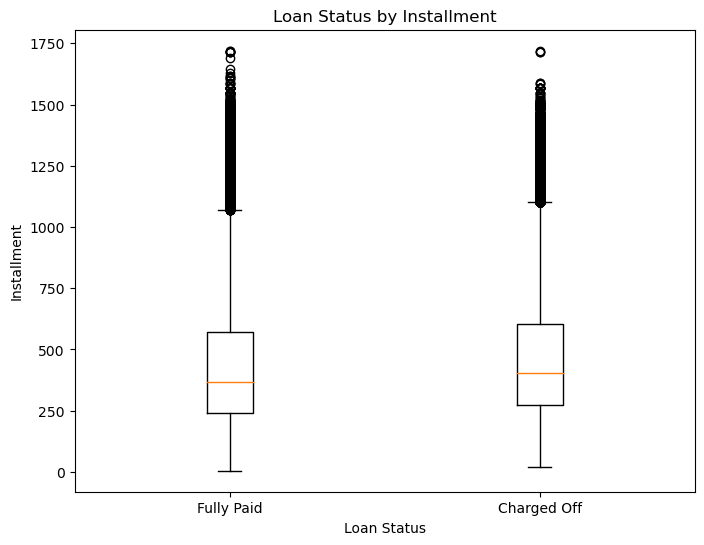

In [53]:
import matplotlib.pyplot as plt

# График "ящик с усами" для 'loan_amnt' по 'loan_status'
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['loan_status'] == 'Fully Paid']['loan_amnt'],
             df[df['loan_status'] == 'Charged Off']['loan_amnt']],
            labels=['Fully Paid', 'Charged Off'])
plt.title('Loan Status by Loan Amount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')

# График "ящик с усами" для 'installment' по 'loan_status'
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['loan_status'] == 'Fully Paid']['installment'],
             df[df['loan_status'] == 'Charged Off']['installment']],
            labels=['Fully Paid', 'Charged Off'])
plt.title('Loan Status by Installment')
plt.xlabel('Loan Status')
plt.ylabel('Installment')

# Отображение графиков
plt.show()


In [54]:
df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,15565.055444,8814.560077,900.0,9000.0,14350.0,20400.0,40000.0
Fully Paid,1076751.0,14134.369808,8669.028973,500.0,7500.0,12000.0,20000.0,40000.0


Выпишем все категориальные признаки.

In [55]:
with pd.option_context('display.max_rows',None):
    display(df.describe(include=np.object).transpose())

/var/folders/dm/ltzh8my50bvc6cdr0_wggrjr0000gq/T/ipykernel_58289/2762848677.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  display(df.describe(include=np.object).transpose())


,count,unique,top,freq
id,1345310,1345310,68407277,1
term,1345310,2,36 months,1020743
grade,1345310,7,B,392741
sub_grade,1345310,35,C1,85494
emp_title,1259525,378353,Teacher,21268
emp_length,1266799,11,10+ years,442199
home_ownership,1345310,6,MORTGAGE,665579
verification_status,1345310,3,Source Verified,521273
issue_d,1345310,139,Mar-2016,48937
loan_status,1345310,2,Fully Paid,1076751


- grade - оценка, присвоенная LendingClub займу
- sub_grade - подоценка, присвоенная LendingClub займу

Поисследуем столбцы Grade и SubGrade, которые LendingClub присваивает займам


In [56]:
print(f"GRADE unique: {df.grade.unique()}")
print(f"SUB_GRADE unique: {df.sub_grade.unique()}")

GRADE unique: ['C' 'B' 'F' 'A' 'E' 'D' 'G']
SUB_GRADE unique: ['C4' 'C1' 'B4' 'F1' 'C3' 'B2' 'B1' 'A2' 'B5' 'C2' 'E2' 'A4' 'E3' 'C5'
 'A1' 'D4' 'F3' 'D1' 'B3' 'D3' 'D5' 'A5' 'F2' 'E4' 'D2' 'E1' 'F5' 'E5'
 'A3' 'G2' 'G1' 'G3' 'G4' 'F4' 'G5']


/var/folders/dm/ltzh8my50bvc6cdr0_wggrjr0000gq/T/ipykernel_58289/487323471.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(fully_paid.index, rotation=90)


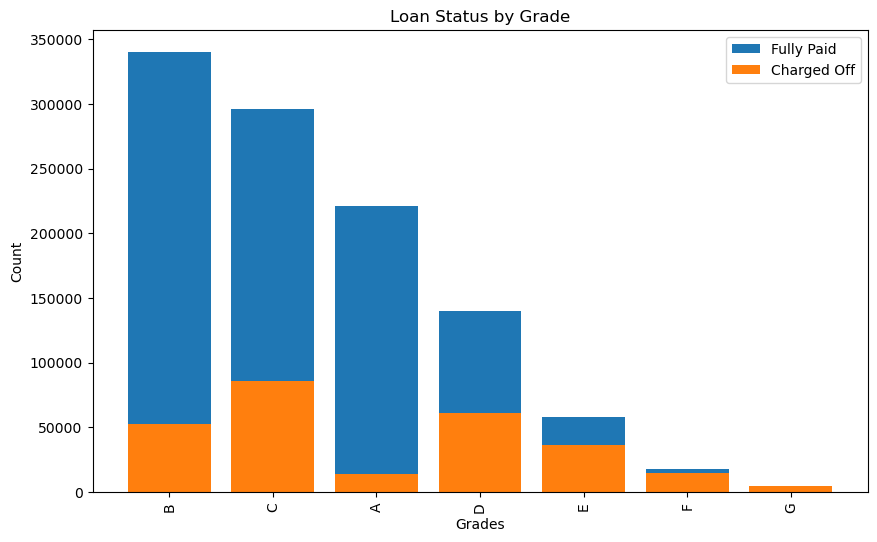

In [59]:
import matplotlib.pyplot as plt

fully_paid = df.loc[df['loan_status']=='Fully Paid', 'grade'].value_counts()
charged_off = df.loc[df['loan_status']=='Charged Off', 'grade'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(fully_paid.index, fully_paid.values, label='Fully Paid')
ax.bar(charged_off.index, charged_off.values, label='Charged Off')
ax.set_title('Loan Status by Grade')
ax.set_xlabel('Grades')
ax.set_ylabel('Count')
ax.set_xticklabels(fully_paid.index, rotation=90)
ax.legend()
plt.show()

/var/folders/dm/ltzh8my50bvc6cdr0_wggrjr0000gq/T/ipykernel_58289/2903551249.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(fully_paid.index, rotation=90)


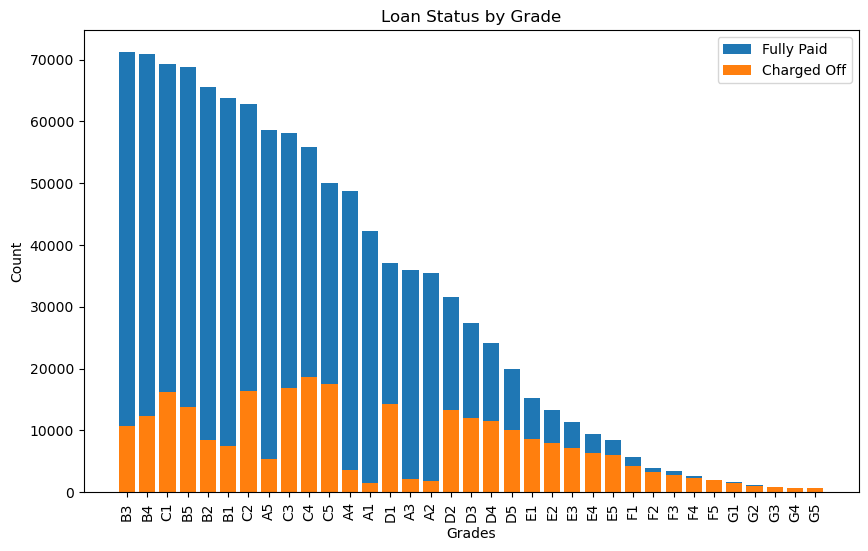

In [61]:
import matplotlib.pyplot as plt

fully_paid = df.loc[df['loan_status']=='Fully Paid', 'sub_grade'].value_counts()
charged_off = df.loc[df['loan_status']=='Charged Off', 'sub_grade'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(fully_paid.index, fully_paid.values, label='Fully Paid')
ax.bar(charged_off.index, charged_off.values, label='Charged Off')
ax.set_title('Loan Status by Grade')
ax.set_xlabel('Grades')
ax.set_ylabel('Count')
ax.set_xticklabels(fully_paid.index, rotation=90)
ax.legend()
plt.show()

Похоже, что субоценки F и G реже всего возвращаются. Выделим их и создадим снова диаграмму подсчета только для этих субоценок.

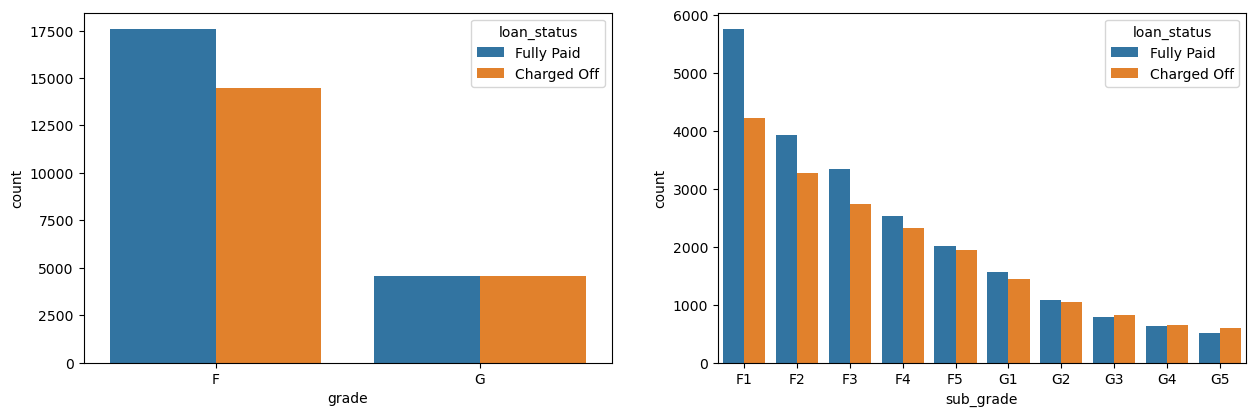

In [62]:
data = df[(df.grade == 'F') | (df.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)

plt.show()

Перейдем к анализу следующих признаков
- term: Количество платежей по кредиту. Значения указаны в месяцах и могут быть 36 или 60.
- home_ownership: Статус владения жильем, указанный заемщиком при регистрации или полученный из кредитного отчета. Возможные значения: RENT (аренда), OWN (собственность), MORTGAGE (ипотека), OTHER (другое).
- verification_status: Указывает, был ли доход подтвержден LendingClub, не подтвержден или подтвержден из другого источника.
- purpose: Категория, указанная заемщиком при запросе кредита.

In [63]:
df['home_ownership'].value_counts()

MORTGAGE    665579
RENT        534421
OWN         144832
ANY            286
OTHER          144
NONE            48
Name: home_ownership, dtype: int64

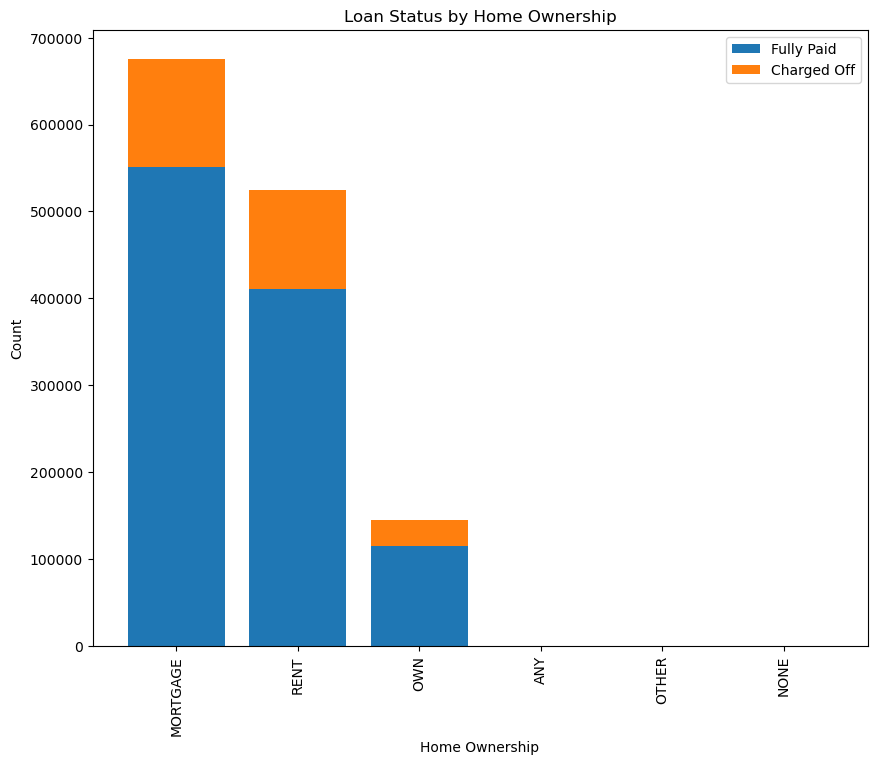

In [64]:
fully_paid = df.loc[df['loan_status'] == 'Fully Paid', 'home_ownership'].value_counts()
charged_off = df.loc[df['loan_status'] == 'Charged Off', 'home_ownership'].value_counts()

fig, ax = plt.subplots(figsize=(10, 8))

x = np.arange(len(fully_paid))

ax.bar(x, fully_paid, label='Fully Paid')
ax.bar(x, charged_off, bottom=fully_paid, label='Charged Off')

ax.set_title('Loan Status by Home Ownership')
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(fully_paid.index)
ax.legend()

plt.xticks(rotation=90)

plt.show()

In [65]:
df.loc[(df.home_ownership == 'ANY') | (df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
df.home_ownership.value_counts()

MORTGAGE    665579
RENT        534421
OWN         144832
OTHER          478
Name: home_ownership, dtype: int64

[Text(0, 0, 'debt_consolidation'),
 Text(1, 0, 'small_business'),
 Text(2, 0, 'home_improvement'),
 Text(3, 0, 'major_purchase'),
 Text(4, 0, 'credit_card'),
 Text(5, 0, 'other'),
 Text(6, 0, 'house'),
 Text(7, 0, 'vacation'),
 Text(8, 0, 'car'),
 Text(9, 0, 'medical'),
 Text(10, 0, 'moving'),
 Text(11, 0, 'renewable_energy'),
 Text(12, 0, 'wedding'),
 Text(13, 0, 'educational')]

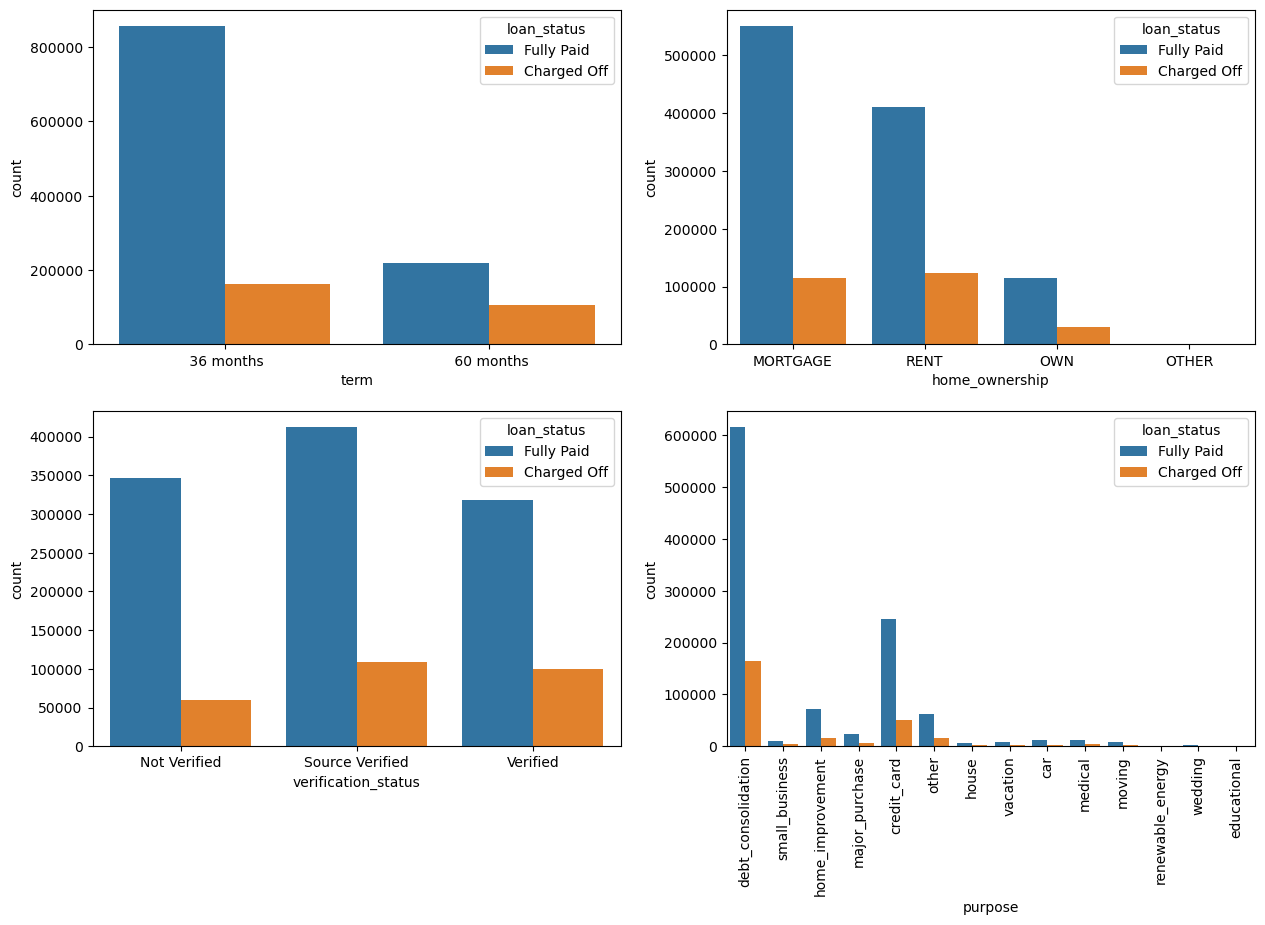

In [66]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=df, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=df, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=df, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [68]:
df.loc[df['home_ownership']=='OTHER', 'loan_status'].value_counts()


Fully Paid     388
Charged Off     90
Name: loan_status, dtype: int64

Я туть

Преобразуем все даты в числовые.

In [11]:
#'issue_d'
date_fields = ['issue_d','earliest_cr_line',
               'last_pymnt_d','last_credit_pull_d']

for col in date_fields:  
    df[col] = pd.to_datetime(df[col]) 
    df[col + '_month'] = df[col].dt.month
    df[col + '_year'] = df[col].dt.year

df = df.drop(date_fields, axis=1)

Поля `emp_title` и `title` содержат слишком много различных значений, сохраним только те, которые чаще всего встречаются

In [12]:
per = 0.01

vc = df['title'].value_counts()
titles = vc.iloc[np.where(np.array(vc) > per * len(df))].index
df['title'] = df.apply(lambda r: r['title'] if r['title'] in titles else 'Other title',axis=1)

In [13]:
vc = df['emp_title'].value_counts()
titles = vc.iloc[np.where(np.array(vc) > per * len(df))].index
df['emp_title'] = df.apply(lambda r: r['emp_title'] if r['emp_title'] in titles else 'Other title',axis=1)

In [14]:
# df

In [15]:
# Создание списка столбцов, которые нужно выбрать
selected_columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc',
                    'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
                    'total_acc', 'mort_acc', 'pub_rec_bankruptcies']

# Создание нового фрейма, содержащего только выбранные столбцы
new_dataframe = df[selected_columns]

<AxesSubplot:>

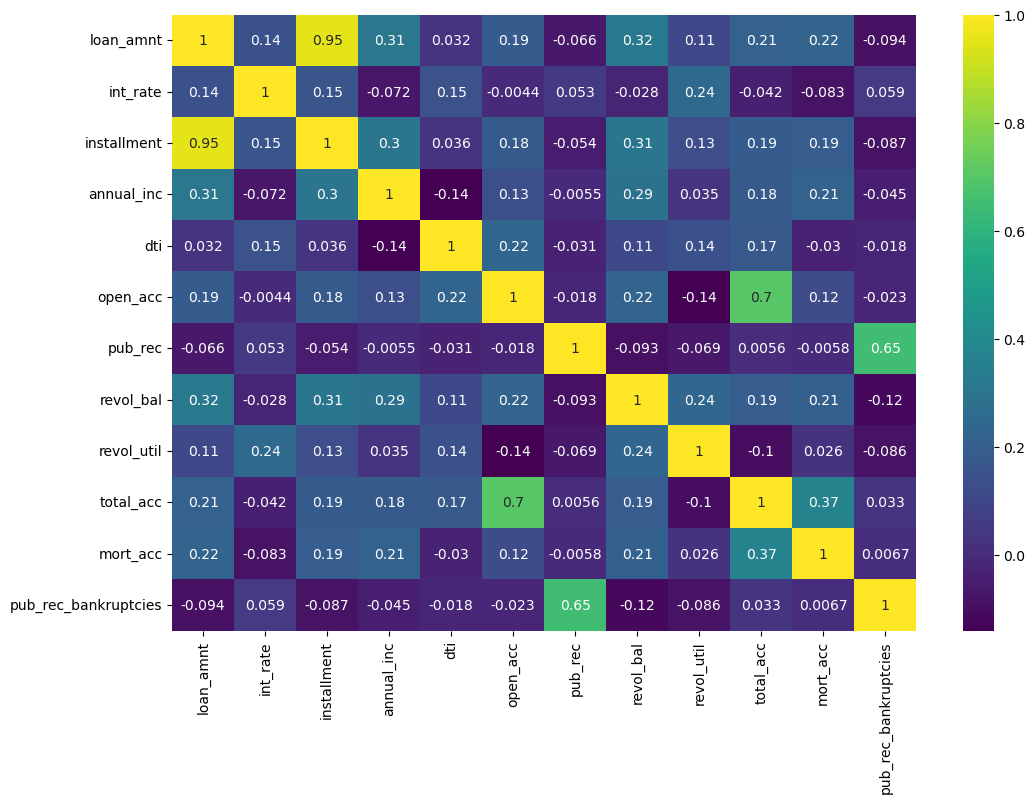

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(new_dataframe.corr(), annot=True, cmap='viridis')